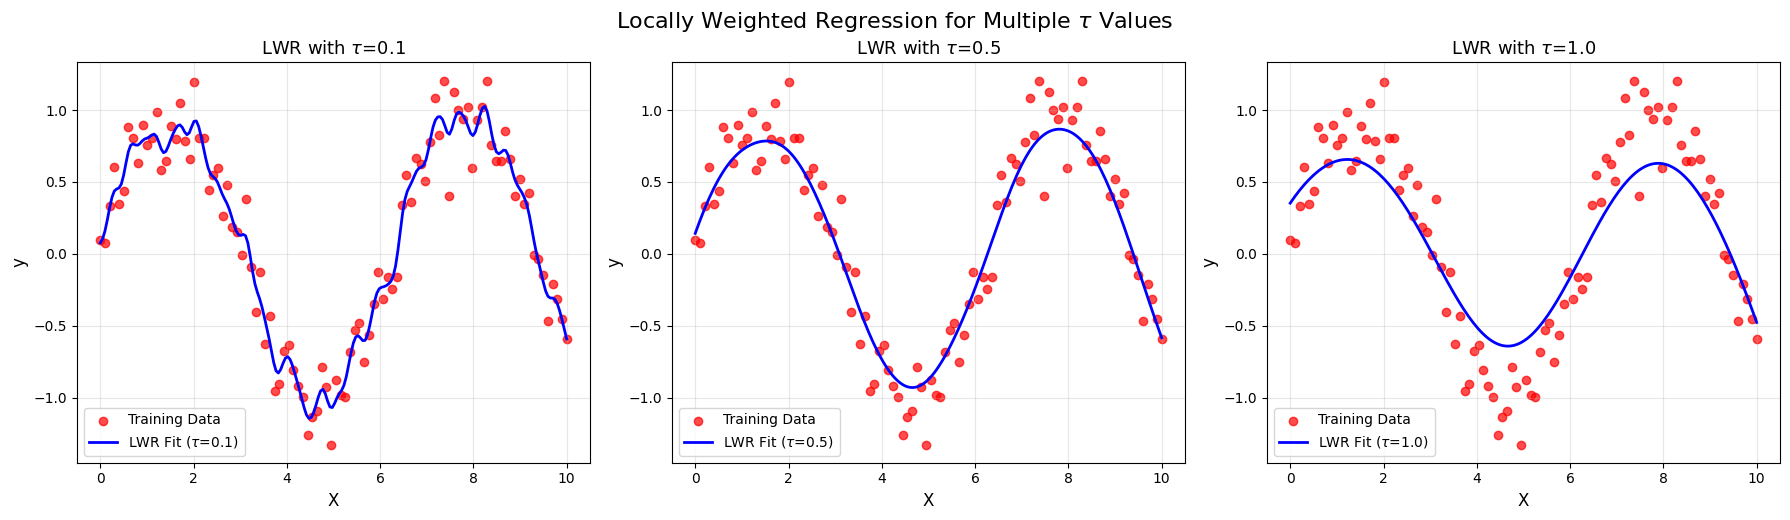

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel function for weighting
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

# Locally Weighted Regression prediction for a single query point
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    # Compute weights for all training points
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    # Compute theta using weighted least squares
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta

# Generate training data (0 to 10 with 0.2 noise)
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + 0.2 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]

# Query points for prediction
x_test = np.linspace(0, 10, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]

# Tau values to compare
tau_values = [0.1, 0.5, 1.0]

plt.figure(figsize=(18, 5))

# Fit and plot LWR for each tau value
for i, tau in enumerate(tau_values):
    y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in x_test_bias])

    plt.subplot(1, len(tau_values), i + 1)
    plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
    plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit ($\\tau$={tau})', linewidth=2)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'LWR with $\\tau$={tau}', fontsize=13)
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Locally Weighted Regression for Multiple $\\tau$ Values', fontsize=16, y=1.03)
plt.show()

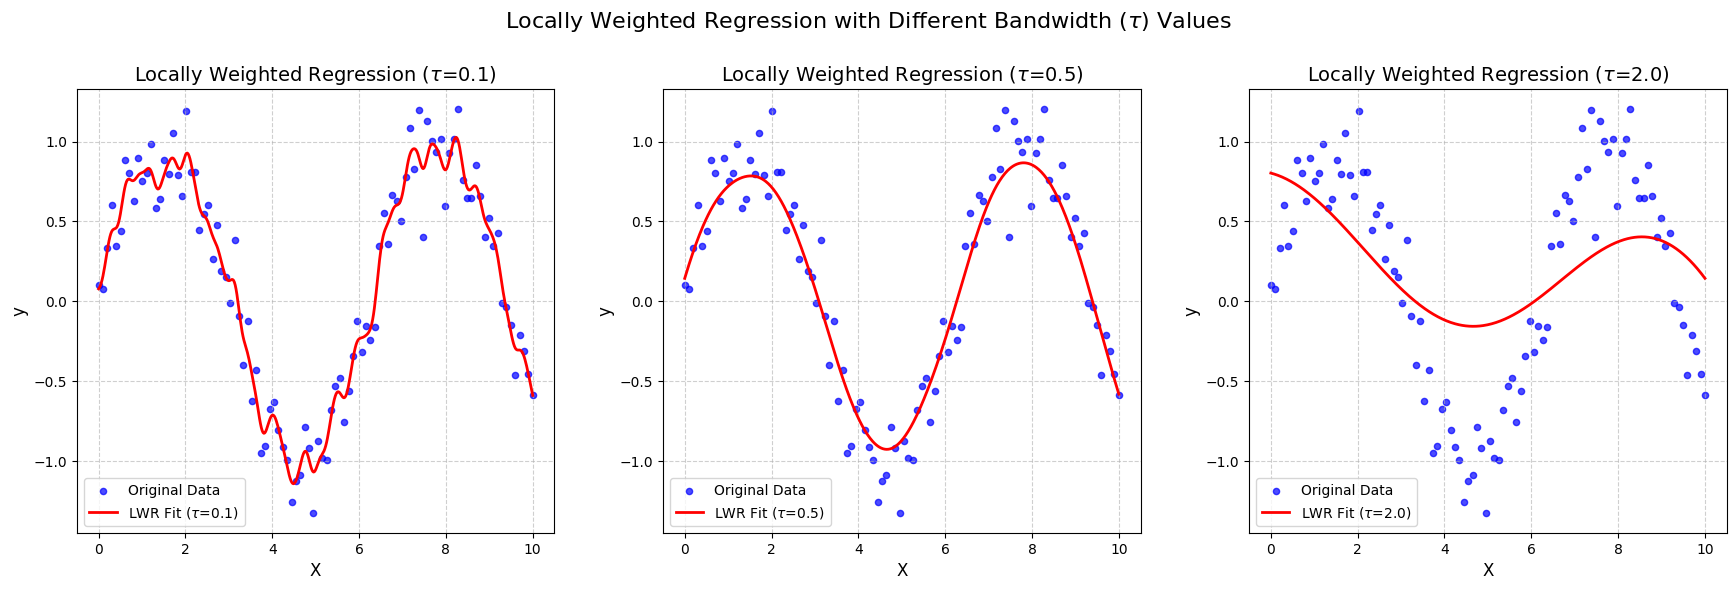

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_train = np.linspace(0, 10, 100)
y_train = np.sin(X_train) + np.random.normal(0, 0.2, 100)

def gaussian_kernel(distance, tau):
    return np.exp(-distance**2 / (2 * tau**2))

def lwr_predict(X_train, y_train, X_query, tau):
    y_pred = []
    for x_q in X_query:
        distances = np.abs(X_train - x_q)
        weights = gaussian_kernel(distances, tau)
        X_design = np.vstack([np.ones_like(X_train), X_train]).T
        W = np.diag(weights)
        try:
            XTWX = X_design.T @ W @ X_design
            XTWy = X_design.T @ W @ y_train
            if np.linalg.det(XTWX) == 0:
                beta = [np.mean(y_train), 0]
            else:
                beta = np.linalg.inv(XTWX) @ XTWy
        except np.linalg.LinAlgError:
            print(f"Warning: Singular matrix encountered at x_q={x_q}. Predicting mean.")
            beta = [np.mean(y_train), 0]
        y_pred.append(beta[0] + beta[1] * x_q)
    return np.array(y_pred)

X_query_plot = np.linspace(X_train.min(), X_train.max(), 500)
tau_values = [0.1, 0.5, 2.0]

plt.figure(figsize=(18, 6))

for i, tau in enumerate(tau_values):
    y_pred_lwr = lwr_predict(X_train, y_train, X_query_plot, tau)
    plt.subplot(1, len(tau_values), i + 1)
    plt.scatter(X_train, y_train, s=20, label='Original Data', alpha=0.7, color='blue')
    plt.plot(X_query_plot, y_pred_lwr, color='red', linewidth=2, label=f'LWR Fit ($\\tau$={tau})')
    plt.title(f'Locally Weighted Regression ($\\tau$={tau})', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(pad=3.0)
plt.suptitle('Locally Weighted Regression with Different Bandwidth ($\\tau$) Values', fontsize=16, y=1.02)
plt.show()


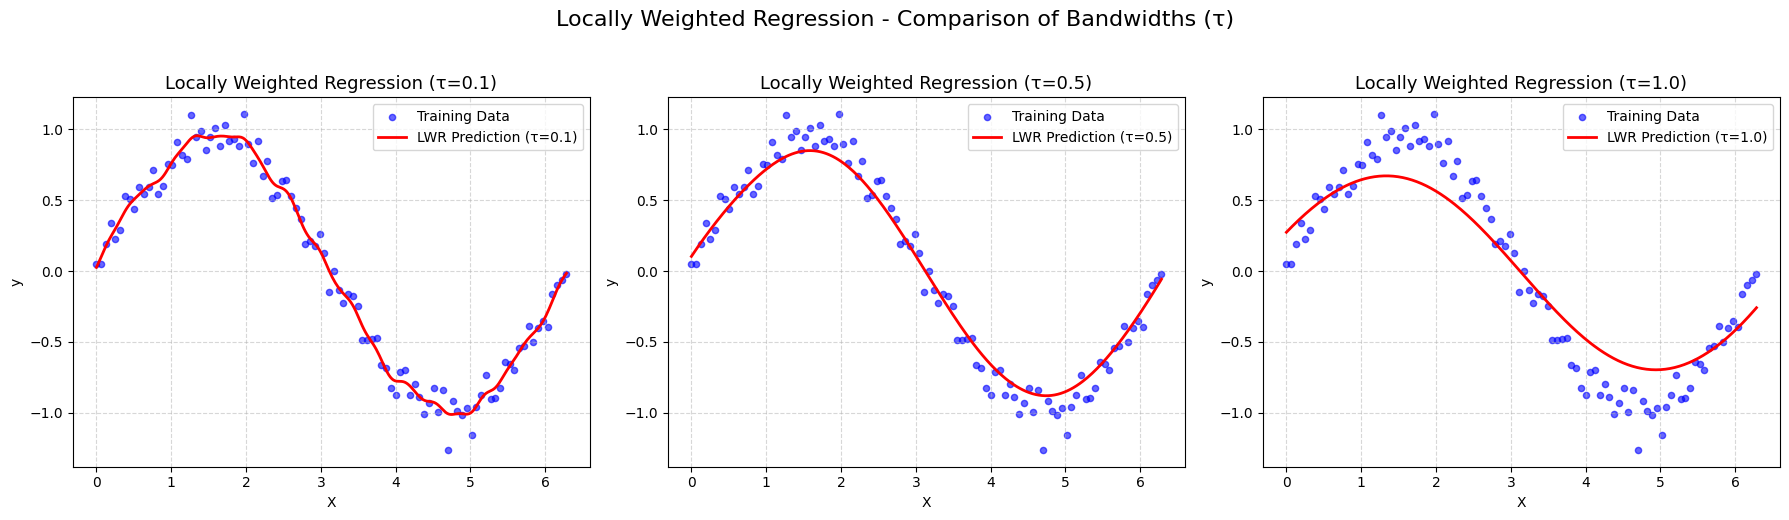

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.linspace(0, 2 * np.pi, 100)
y_train = np.sin(X_train) + 0.1 * np.random.randn(100)

def gaussian_kernel(x, xi, tau):
    """Gaussian kernel using L2 distance."""
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def lwr_predict(X_train, y_train, X_query, tau):
    """Locally Weighted Regression prediction."""
    y_pred = []
    for x_q in X_query:
        x_q_bias = np.array([1, x_q])  # Add bias term
        X_design = np.c_[np.ones(X_train.shape), X_train]  # [1, x_i] for all i
        weights = np.array([gaussian_kernel(x_q_bias, xi, tau) for xi in X_design])
        W = np.diag(weights)

        try:
            XTWX = X_design.T @ W @ X_design
            XTWy = X_design.T @ W @ y_train
            if np.linalg.det(XTWX) < 1e-10:
                beta = np.array([np.mean(y_train), 0])
            else:
                beta = np.linalg.inv(XTWX) @ XTWy
        except np.linalg.LinAlgError:
            beta = np.array([np.mean(y_train), 0])
        y_pred.append(x_q_bias @ beta)
    return np.array(y_pred)

# Query points for prediction
X_query_plot = np.linspace(X_train.min(), X_train.max(), 300)

# Bandwidths to compare
tau_values = [0.1, 0.5, 1.0]

# Plot
plt.figure(figsize=(18, 5))
for i, tau in enumerate(tau_values):
    y_pred = lwr_predict(X_train, y_train, X_query_plot, tau)

    plt.subplot(1, len(tau_values), i + 1)
    plt.scatter(X_train, y_train, label='Training Data', color='blue', s=20, alpha=0.6)
    plt.plot(X_query_plot, y_pred, label=f'LWR Prediction (τ={tau})', color='red', linewidth=2)
    plt.title(f'Locally Weighted Regression (τ={tau})', fontsize=13)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Locally Weighted Regression - Comparison of Bandwidths (τ)', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()
